In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

C:\Users\truji\AppData\Local\Temp\ipykernel_59080\3259525500.py:31: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp + fp)


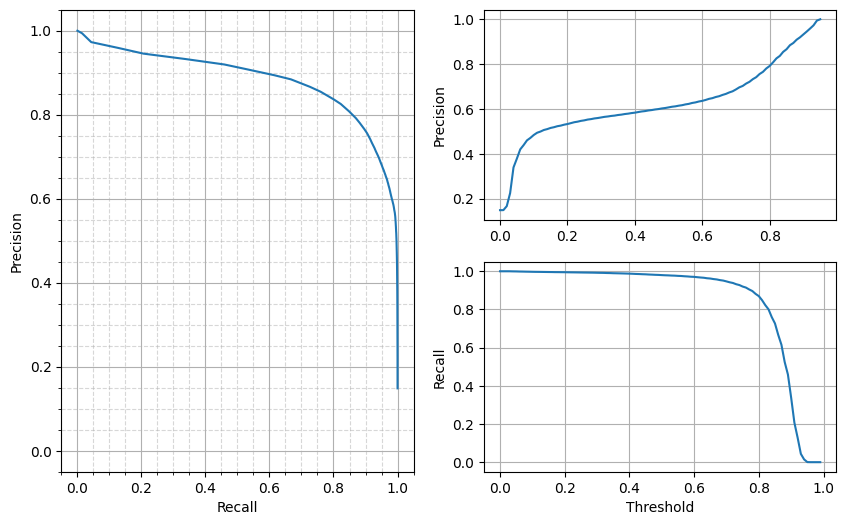

In [100]:
pred_path = r"results\shallowUNET_v3_bn_dice_ep25"
gt_path = r"data\labels"

img_name = "um_000001"

pred = cv2.imread(f"{pred_path}/{img_name}.png", cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(f"{gt_path}/mask_{img_name.split("_")[0]}_road_{img_name.split("_")[1]}.png", cv2.IMREAD_GRAYSCALE)
gt *= 255

# cv2.imshow("pred", pred)
# cv2.imshow("gt", gt)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# prepare for metrics
pred = pred.astype(float)/255. # in a range of 0 to 1 indicating probs
gt = gt.astype(float)/255.   # [0, 1]

# compute metrics on pixel similarity
thr_vec = np.arange(0, 1, step=0.01)
precision_vec = np.zeros_like(thr_vec)
recall_vec = np.zeros_like(thr_vec)

for i, thr in enumerate(thr_vec):
    pred_road = np.zeros_like(pred)
    pred_road[pred >= thr] = 1.

    tp = np.sum(pred_road * gt)  # both are ones
    fp = np.sum((pred_road > 0.95) & (gt == 0))
    fn = np.sum((pred_road < 0.05) & (gt > 0.95))
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    precision_vec[i] = precision.item()
    recall_vec[i] = recall.item()

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

ax1.minorticks_on()
ax1.grid(which='minor', linestyle='--', alpha=0.5)
ax1.grid(which='major', linestyle='-')
ax1.set_xlabel("Recall")
ax1.set_ylabel("Precision")
ax1.set_xlim(-0.05, 1.05)
ax1.set_ylim(-0.05, 1.05)
ax1.plot(recall_vec, precision_vec, '-')

ax2.grid()
ax2.set_ylabel("Precision")
ax2.plot(thr_vec, precision_vec, '-')

ax3.grid()
ax3.set_xlabel("Threshold")
ax3.set_ylabel("Recall")
ax3.plot(thr_vec, recall_vec, '-')

plt.show()